In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import os

from scale.plot import plot_confusion_matrix, plot_embedding, plot_heatmap
from scale.utils import read_labels, reassign_cluster_with_ref
from scale.specifity import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
input_dir = '../data/GM12878vsHEK/' ## containing data.txt and labels.txt
out_dir = '../result/GM12878vsHEK/' ## all running results saved in the out_dir

In [3]:
raw = pd.read_csv(input_dir+'data.txt', sep='\t', index_col=0)
ref, classes, le = read_labels(input_dir+'labels.txt', return_enc=True)
y = le.inverse_transform(ref)

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Fig. S2 Feature embedding
different color representing ground truth cell types

In [4]:
os.makedirs('tsne', exist_ok=True)
feature = pd.read_csv(out_dir+'feature.txt', sep='\t', index_col=0, header=None)

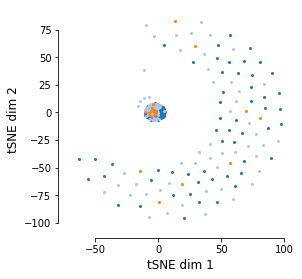

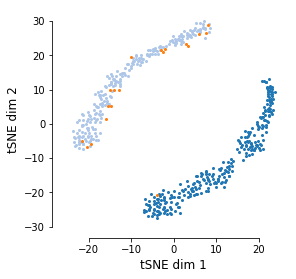

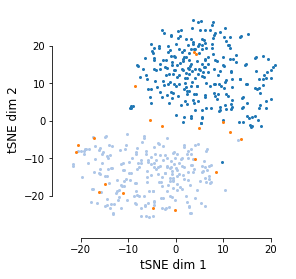

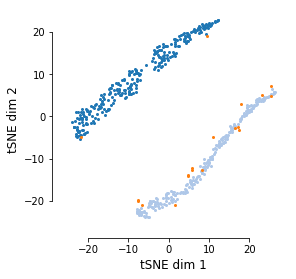

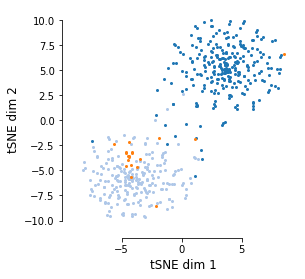

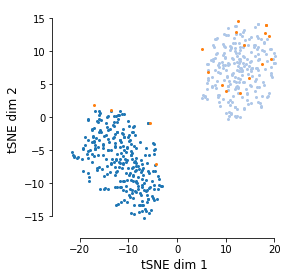

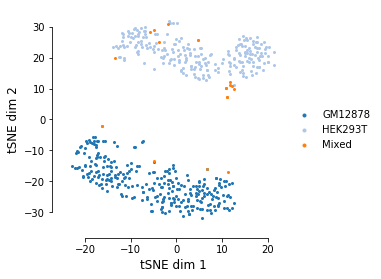

In [6]:
for method in ['raw', 'pca', 'scvi', 'cicero', 'tfidf', 'cisTopic', 'scale']:
    emb = np.loadtxt(out_dir+'{}_emb.txt'.format(method))
    if method != 'scale':
        show_legend=False
    else:
        show_legend=True
    plot_embedding(emb, y, classes, show_legend=show_legend, markersize=4, 
                   save_emb='tsne/{}_emb.txt'.format(method), save='tsne/{}_emb.pdf')

## Fig. S3 Trajectory relationships visualization with UMAP

In [7]:
os.makedirs('umap', exist_ok=True)

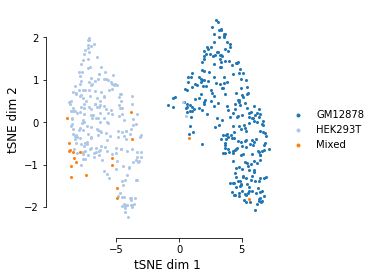

In [8]:
# feature = pd.read_csv(out_dir+'feature.txt', sep='\t', index_col=0, header=None)
# plot_embedding(feature, y, classes, show_legend=True, method='UMAP', markersize=4,
#                save_emb='umap/trajectory_emb.txt', save='umap/trajectory_emb.pdf')
umap_emb = np.loadtxt(out_dir+'trajectory_emb.txt')
plot_embedding(umap_emb, y, classes, show_legend=True, markersize=4,
               save_emb='umap/trajectory_emb.txt', save='umap/trajectory_emb.pdf')

## Fig. S4 Clustering accuracy by confusion matrix 
cluster assignments compared with ground truth

In [9]:
os.makedirs('confusion_matrix', exist_ok=True)

In [10]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score, f1_score

Method: scABC  ARI score: 0.890  NMI score: 0.836 F1 score: 0.952


/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


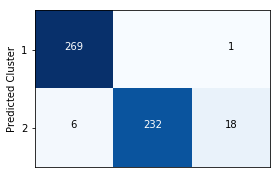

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Method: SC3  ARI score: 0.927  NMI score: 0.886 F1 score: 0.962


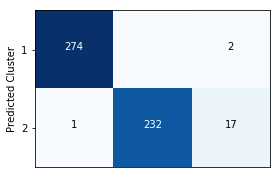

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Method: scVI  ARI score: 0.046  NMI score: 0.028 F1 score: 0.584


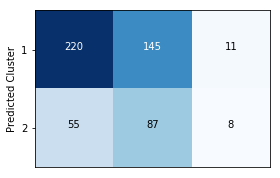

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Method: Cicero  ARI score: 0.055  NMI score: 0.047 F1 score: 0.603


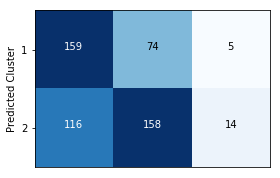

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Method: TF-IDF  ARI score: 0.848  NMI score: 0.769 F1 score: 0.941


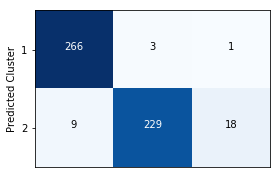

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Method: cisTopic  ARI score: 0.933  NMI score: 0.893 F1 score: 0.964


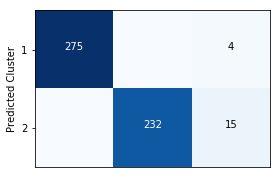

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Method: SCALE  ARI score: 0.931  NMI score: 0.886 F1 score: 0.964


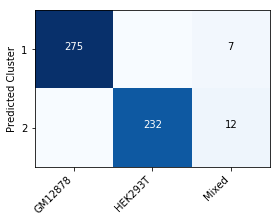

In [11]:
scABC_pred, _ = read_labels(out_dir+'scABC_predict.txt')
SC3_pred, _ = read_labels(out_dir+'SC3_predict.txt')
scVI_pred, _ = read_labels(out_dir+'scVI_predict.txt')
cisTopic_pred, _ = read_labels(out_dir+'cisTopic_predict.txt')
Cicero_pred, _ = read_labels(out_dir+'Cicero_predict.txt')
tfidf_pred, _ = read_labels(out_dir+'tfidf_clusters.txt')
scale_pred, pred_classes = read_labels(out_dir+'cluster_assignments.txt')

show_yticks = True
methods = ['scABC', 'SC3', 'scVI', 'Cicero', 'TF-IDF', 'cisTopic', 'SCALE']
for pred, method in zip([scABC_pred, SC3_pred, scVI_pred, Cicero_pred, tfidf_pred, cisTopic_pred, scale_pred], methods):
    pred = reassign_cluster_with_ref(pred, ref)
    ari = adjusted_rand_score(ref, pred)
    nmi = normalized_mutual_info_score(ref, pred)
    f1 = f1_score(ref, pred, average='micro')
    pred = le.inverse_transform(pred)
    cm = confusion_matrix(pred, y, labels=classes)

    if method == 'SCALE':
        show_xticks=True
    else:
        show_xticks=False
    print("Method: {}  ARI score: {:.3f}  NMI score: {:.3f} F1 score: {:.3f}".format(method, ari, nmi, f1))
    plot_confusion_matrix(cm[:2], classes, pred_classes+1, title='', normalize=False, figsize=(4,4), show_cbar=False, 
                          show_xticks=show_xticks, show_yticks=True, save='confusion_matrix/'+method+'.pdf')   

## Fig. S6 The impact of data corruption on the clustering acccuracy

/home/xionglei/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


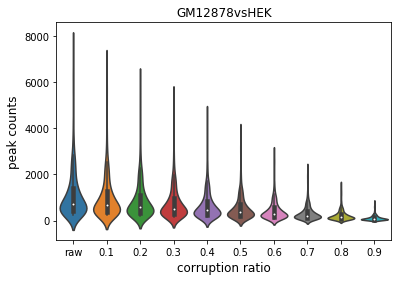

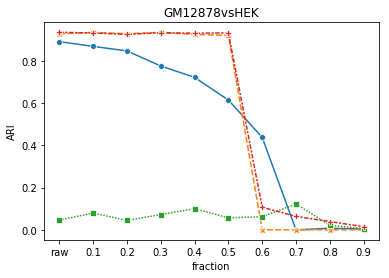

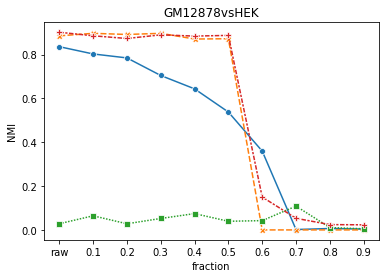

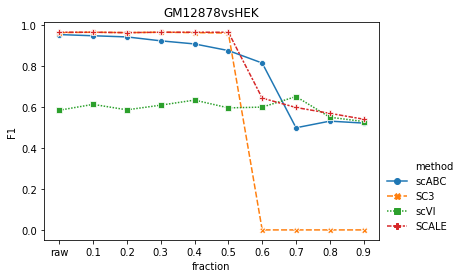

In [12]:
dataset = 'GM12878vsHEK'
cell_counts =[]
cell_counts.append(raw.sum(0))
for frac in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    corrupt_data = pd.read_csv('../corrupt_data/GM12878vsHEK/data_corrupt_{}.txt'.format(frac), sep='\t', index_col=0)
    cell_counts.append(corrupt_data.sum(0))
    
g = sns.violinplot(data=cell_counts, scale='width')
g.set_xticklabels(['raw', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])
plt.title(dataset)
plt.ylabel('peak counts', fontsize=12)
plt.xlabel('corruption ratio', fontsize=12)
plt.show()

from scale.plot import plot_metrics
path = '../corrupt_result/'
corrupt_data_path = '../corrupt_data/'
fraction = ['raw', 'corrupt_0.1', 'corrupt_0.2', 'corrupt_0.3', 'corrupt_0.4', 'corrupt_0.5', 
           'corrupt_0.6', 'corrupt_0.7', 'corrupt_0.8', 'corrupt_0.9']
plot_metrics(path, dataset, ref, fraction = fraction)

## Fig. S7 Imputation efficiency

In [44]:
os.makedirs('imputation', exist_ok=True)
classes = ['GM12878', 'HEK293T']

In [23]:
imputed = pd.read_csv(out_dir + 'imputed_data.txt', sep='\t', index_col=0)
scimpute = pd.read_csv(out_dir + 'scimpute_count.csv', sep=',', index_col=0)
saver = pd.read_csv(out_dir+'SAVER_imputed.txt', sep='\t', index_col=0)
magic = pd.read_csv(out_dir+'Magic_imputed.txt', sep='\t', index_col=0)
scVI = pd.read_csv(out_dir+'scVI_imputed.txt', sep='\t', index_col=0)

#### Cells correlation of imputed data with meta-cells of each cell type

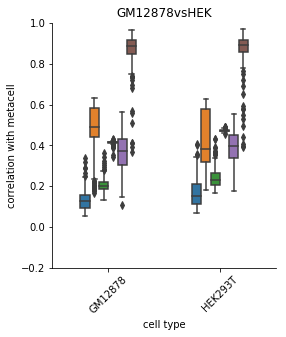

In [45]:
cell_concat = pd.read_csv(out_dir+'metacell_correlation.txt', sep='\t', index_col=0)
figsize = (min(len(classes)*2, 20), 4.5)
plt.figure(figsize=figsize)
g = sns.boxplot(x='cell type', y='correlation with metacell', hue='method', width=0.5, data=cell_concat)
plt.ylim(-0.2, 1)
plt.legend().set_visible(False)
plt.title('GM12878vsHEK')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.setp(g.get_xticklabels(), rotation=45)
plt.savefig('imputation/metacell_correlation.pdf', format='pdf', bbox_inches='tight')

## Fig. S8 Inter and intra-correlation of subgroups of the raw and the imputed data

scImpute


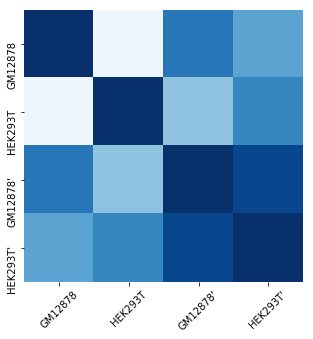

SAVER


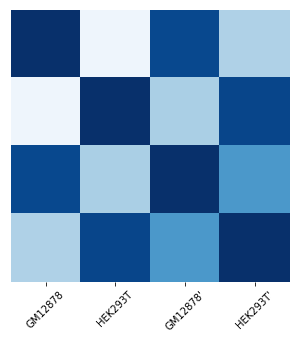

MAGIC


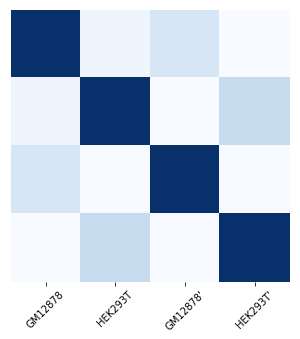

scVI


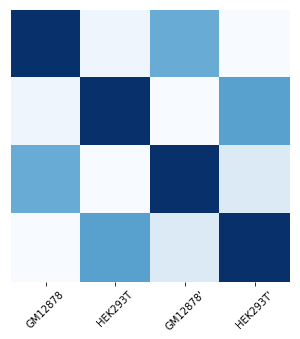

SCALE


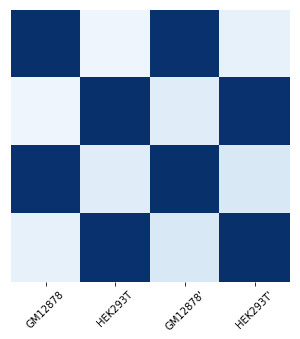

In [30]:
methods = ['scImpute', 'SAVER', 'MAGIC', 'scVI', 'SCALE']
raw_meta = []
scale_meta = []

for c in classes:
    index = np.where(y==c)[0]
    raw_meta.append(raw.iloc[:, index].mean(axis=1))
raw_meta = pd.DataFrame(raw_meta)

yticklabels = True
for i, data in enumerate([scimpute, saver, magic, scVI, imputed]):
    print(methods[i])
    meta = []
    for c in classes:
        index = np.where(y==c)[0]
        meta.append(data.iloc[:, index].mean(axis=1))
    meta = pd.DataFrame(meta)

    plt.figure(figsize=(5,5))
    classes_ = [ c+"'" for c in classes]
    ticklabels = np.concatenate([classes, classes_])
    
    if yticklabels:
        yticklabels = ticklabels
    g = sns.heatmap(np.corrcoef(raw_meta, meta), cmap='Blues', 
                xticklabels=ticklabels, yticklabels=yticklabels, vmin=0.3, vmax=1, cbar=False)
    g.set_xticklabels(ticklabels, rotation=45)
    plt.savefig('imputation/'+methods[i]+'_corr.pdf', format='pdf', bbox_inches='tight')
    plt.show()
    
    yticklabels=False

## Fig. S9 Cluster-specific peaks of raw, imputed and binary imputed data

In [31]:
from scale.specifity import cluster_specific, mat_specificity_score
from scale.utils import binarization

### binarization imputed data

In [32]:
binary = binarization(imputed, imputed)

In [33]:
scale_pred_ = reassign_cluster_with_ref(scale_pred, ref)
y_pred = np.array(['cluster'+str(i+1) for i in scale_pred_])

In [35]:
# score_mat = mat_specificity_score(raw, ref)
# score_mat.to_csv(out_dir+'score_mat.txt', sep='\t')

score_mat = pd.read_csv(out_dir+'score_mat.txt', sep='\t', index_col=0)

In [36]:
peak_index, peak_labels = cluster_specific(score_mat, le.transform(classes), top=200)

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


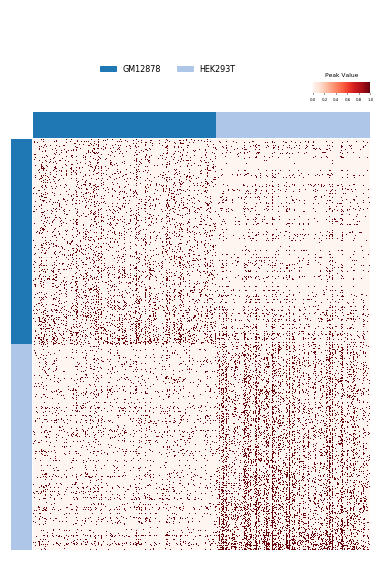

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


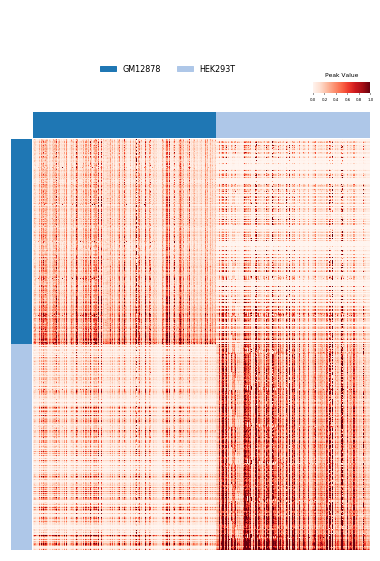

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


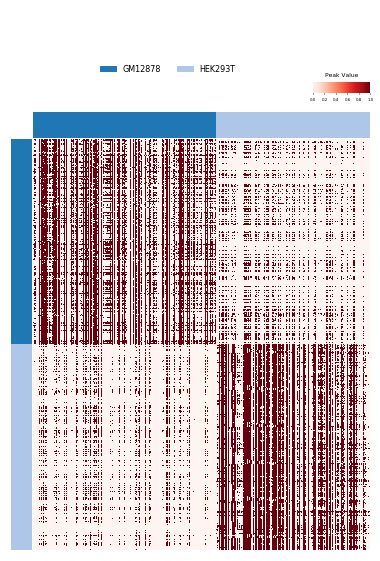

In [37]:
for data in [raw, imputed, binary]:
    plot_heatmap(data.iloc[peak_index], y=y, classes=classes, row_labels=le.inverse_transform(peak_labels), 
             ncol=3,cmap='Reds', vmax=1, row_cluster=False, legend_font=8, cax_title='Peak Value',
             figsize=(8, 10), bbox_to_anchor=(0.4, 1.2), position=(0.8, 0.76, 0.1, 0.015))

## Fig. S11 imputation on different corruption fraction 

In [38]:
def group_boxplot(data):
    plt.figure(figsize=(8,4))
    sns.boxplot(x='corruption fraction', y='correlation with metacell', hue='method', width=0.5, data=data)
#     sns.despine(offset=10, trim=True)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.legend().set_visible(False)

    plt.show()

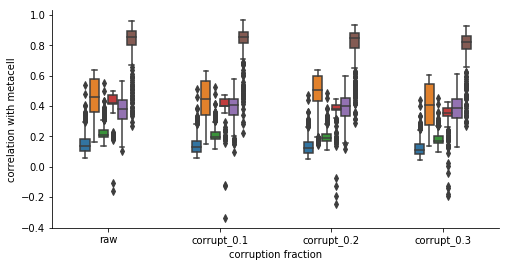

In [39]:
os.makedirs('corrupt_correlation', exist_ok=True)
cell_concat = pd.read_csv(out_dir+'corrupt_correlation.txt', sep='\t', index_col=0)
group_boxplot(cell_concat)

## Fig. S20 Component center and soft assignment of GMM in SCALE

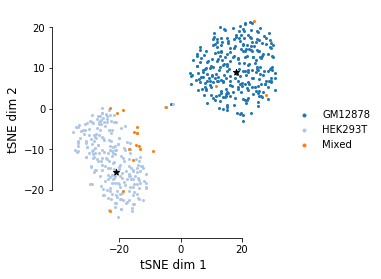

Method: SCALE  ARI score: 0.895  NMI score: 0.828 F1 score: 0.954


/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


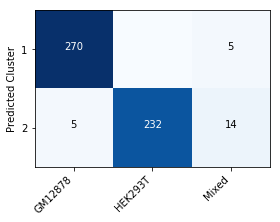

In [43]:
classes = ['GM12878', 'HEK293T','Mixed']
emb = np.loadtxt(out_dir+'gmm_tsne.txt')
plot_embedding(emb[:len(y)], y, markersize=4, marker=emb[len(y):])

pred, _ = read_labels(out_dir+'gmm_predict.txt')
pred = reassign_cluster_with_ref(pred, ref)
ari = adjusted_rand_score(ref, pred)
nmi = normalized_mutual_info_score(ref, pred)
f1 = f1_score(ref, pred, average='micro')
pred = le.inverse_transform(pred)
cm = confusion_matrix(pred, y, labels=classes)

print("Method: {}  ARI score: {:.3f}  NMI score: {:.3f} F1 score: {:.3f}".format(method, ari, nmi, f1))
plot_confusion_matrix(cm[:2], classes, pred_classes+1, title='', normalize=False, figsize=(4,4), show_cbar=False, 
                          show_xticks=show_xticks, show_yticks=True) 